In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Load the dataset
data = pd.read_csv('flight.csv')

# Drop unnecessary columns
data.drop(columns=['leavetime', 'reachtime', 'leavehour', 'day'], inplace=True)

# Define the target variable and separate features and target
target = 'charge'
X = data.drop(target, axis=1)
y = data.loc[:, target]

# Encode categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=20)

# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)



LinearRegression()

In [117]:
y_pred = model.predict(X_test)

In [ ]:
print(list(X))
print(model.coef_)
print(model. intercept_)

In [ ]:
# 실젯값, 예측값 비교
print(y_test.values[:10])
print(y_pred[:10])

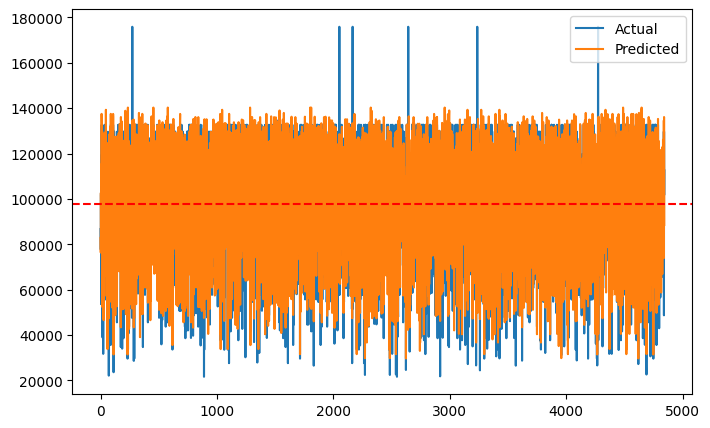

In [120]:
import matplotlib.pyplot as plt
# 실젯값, 예측값 시각화
plt.figure(figsize=(8, 5))
plt.plot(y_test.values)
plt.plot(y_pred)
plt.axhline(y_test.mean(), color='r', linestyle='--')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [121]:
# 함수 불러오기
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 성능 평가
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 8786.267771330075
MSE: 139803287.07834035
RMSE: 11823.844006005
R2-Score: 0.8040730592161232


In [122]:
# 성능 평가
print('Score:', model.score(X_test, y_test))

Score: 0.8040730592161232


In [126]:
def predict_charge(name, seat, date, airport):
    # Preprocess the user input to match the format of the training data
    user_input = pd.DataFrame({
        'name': [name],
        'seat': [seat],
        'date': [date],
        'airport': [airport]
    })

    # Encode the categorical features
    user_input_encoded = encoder.transform(user_input)

    # Make predictions
    predicted_charge = model.predict(user_input_encoded)

    return predicted_charge[0]

# Example usage
name = "대한항공"
seat = "특가석"
date = "2023-07-25"
airport = "CJU"

predicted_value = predict_charge(name, seat, date, airport)
print(f"Predicted charge for {name} in {seat} seat, flying on {date} from {airport} airport: {predicted_value}")

Predicted charge for 대한항공 in 특가석 seat, flying on 2023-07-25 from CJU airport: 72399.18527418864


In [133]:
import joblib

#피클링 파일 생성
joblib.dump(model, './flight_model.pkl')

In [129]:
#피클링 파일 로드
loaded_model = joblib.load('./flight_model.pkl')